# Introduction to Python for Scientific Computing

This notebook will introduce some basic Python syntax and data types, with a particular emphasis on the NumPy and pyplot modules.

We will show examples of:
- Markdown for documenting our code
- Basic Arithmetic Operations
- Loops and logic
- Formatted Printing
- Defining functions
- NumPy arrays
- Plotting

## Arithmetic operations

Standard operations are implemented: `+`, `-`, `*`, `/`

Modulus operation: `%`  
Exponentiation: `**`  

In [7]:
print( 2 - 3**2)
# print( type(2 - 3**2))

print(4/2)
# print(type(4/2))


-7
2.0
1


## Loops and lists

We will show the construction of a simple list of squares in three different ways:
- typing it out
- building it in a `for` loop
- using list comprehension

In [2]:
squares = [1, 4, 9, 16]
print(squares)

[1, 4, 9, 16]


Using a loop, we can build the list.  
`range(start, stop, step)`  
allows us to loop from the start, up to, but not including stop, with a step (default of 1)

In [3]:
squares = []
for i in range(1, 5):  
    squares.append(i**2)
print(squares)

[1, 4, 9, 16]


Using a list comprehension,  
`[expression for variable in iterable]`  
We put the emphasis on the list being created, in a compact way.

In [4]:
squares = [i**2 for i in range(1,5)]
print(squares)

[1, 4, 9, 16]


A list is zero indexed and supports slicing

In [ ]:
# What will each of these give?
# print(squares[2])
# print(squares[4])
# print(squares[2:4])

A list is iterable, so we can loop directly over its elements

In [5]:
for s in squares:
    print(s**3)

1
64
729
4096


### While loops

Another common construction we will use is a `while` loop:

`while expression:
    run 
    these 
    statements
`
It will continue running as long as `expression` evaluates to true or until a `break` statement is encounted.  For example, we saw `while (b-a)/2 > TOL:` for our bisection method.  

Care is needed to make sure that we don't get stuck in an infinite loop.

### Example: approximating a sum, with formatted printing

We take an example, summing a series, and printing out the variables using f-strings.

In [6]:
N = 10

x = 0.
for i in range(1, N+1):
    x += 1/ i**2
print(f'After {N=} terms we have the partial sum {x=}')

After N=10 terms we have the partial sum x=1.5497677311665408


Let's format the partial sums in a nicer table:

In [11]:
N = 10
x = 0.
print(f'{"n":^5} | {"sum":^8}')
print('-'*16)
for i in range(1, N+1):
    x += 1/ i**2
    if i % (N//10) == 0:  
        print(f'{i:5} | {x:8.6f}')
        

  n   |   sum   
----------------
    1 | 1.000000
    2 | 1.250000
    3 | 1.361111
    4 | 1.423611
    5 | 1.463611
    6 | 1.491389
    7 | 1.511797
    8 | 1.527422
    9 | 1.539768
   10 | 1.549768


### Equals sign: assignment vs testing, and finite precision

Single equals sign `=` is used for assignment and
Double equals sign `==` is used for testing equality.  Take care with floats and equality!

In [12]:
# Objectivly true statement 1
print( 1 + 1 == 2)

True


In [13]:
# Objectivly true statement 2
print( 0.1 + 0.2 == 0.3)

False


**What?!?**  We will explain why the behavior above happens in the following lectures.  In short, the finite precision representation used for floating point numbers cannot represent the values 0.1, 0.2, or 0.3 exactly, since they use binary.

In practice, we should instead use `math.isclose()` or `numpy.isclose()`, though we will often want to think precisely about why we are asking if two floating point numbers are equal or close.

In [14]:
import math
math.isclose(0.1 + 0.2, 0.3)

True

## Functions in Python

We can make user-defined functions in Python with the syntax
`def function(parameter1, parameter2, parameter3=default_value):
    return None
`

For example, let's define our own factorial function (though there is one built-in)

In [15]:
def factorial(n):
    '''Takes a non-negative integer n and returns n!'''
    fac = 1.
    
    # Fill in the function here
    for i in range(1, n+1):
        fac *= i
    
    return fac

In [16]:
#Let's test our code
print(f'{factorial(0)=}')
print(f'{factorial(1)=}')
print(f'{factorial(5)=}')

factorial(0)=1.0
factorial(1)=1.0
factorial(5)=120.0


## NumPy Package

NumPy is a powerful package for mathematics and data analysis
* Efficient implementation in lower level languages
    - Actively used in scientific computing and data analysis 
* Flexible syntax for array options
    - Similar to Matlab for those familiar

In [21]:
import numpy as np   # np is a standard shortcut.
import matplotlib.pyplot as plt # standard module for plots

### Array type
Arrays are the fundamental data type provided by numpy.
- Meant for homogeneous types with efficient storage and operations.  
- Much functionality is provided for linear algebra operations.

In [22]:
#Start from a list
l = [5,12,13]
a = np.array(l)
print(l)
print(a)

[5, 12, 13]
[ 5 12 13]


### Useful built-ins for common array types

In [23]:
a = np.zeros(5)
print(a)
b = np.ones(5)
print(b)
print(np.linalg.norm([3,4]))

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
5.0


### numpy.linspace
linspace(start, stop, num) creates an array from start to stop (inclusive) with num entries.  This is useful as the domain for a function we are plotting.

In [24]:
c = np.linspace(1,5,17)
print(c)

[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.   4.25
 4.5  4.75 5.  ]


### Elementwise operations

In [25]:
b = np.linspace(1,5,5)
c = np.array([3, 1.2, 1.1, 3, 3])

# addition and scalar multiplication
print(b + 2*c)
# elementwise operations:
print(c**2)
print(c * (b+c))
# proper dot product
print(b)
print(c)
print(np.dot(b,c))

[ 7.   4.4  5.2 10.  11. ]
[9.   1.44 1.21 9.   9.  ]
[12.    3.84  4.51 21.   24.  ]
[1. 2. 3. 4. 5.]
[3.  1.2 1.1 3.  3. ]
35.7


## Basic plotting

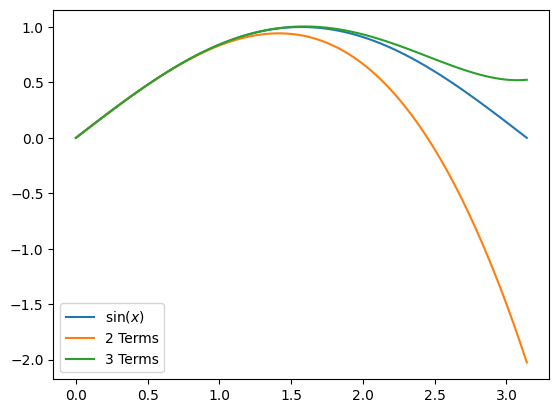

In [26]:
import numpy as np   
import matplotlib.pyplot as plt 

x = np.linspace(0,np.pi,100)
plt.plot(x,np.sin(x))
plt.plot(x, x - x**3/6)
plt.plot(x, x - x**3/6 + x**5/120)
plt.legend(['$\sin(x)$','2 Terms', '3 Terms'])

In [ ]:

def taylor_sin(x, n):
    '''computes the first n non-zero terms of the Taylor series approximation of sin at x'''
    
    y = 0.
    
    # Implement this
    
    return y

In [ ]:

# x = np.linspace(0,np.pi,100)
# plt.plot(x,np.sin(x))
# plt.plot(x, taylor_sin(x,2))
# plt.plot(x, taylor_sin(x,3))
# plt.legend(['$\sin(x)$','2 Terms', '3 Terms'])